In order to predict Tesla's stocks prices, we are going to use a regression algorithm. Regression models are generally used to predict a continuous value given a set of features, which are in this case: prices low and high, date/time. 

Linear regression is a very simple model, and in this case we are trying to predict future pricing only based on date. We are aware that this is not good enough in the real world, as there are mutiple factors contributing to stock pricing - such as company financials and economical indicators. 

In [1]:
#Importing all the libraries we need
%matplotlib inline
import pandas as pd
import numpy as np
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score # to evaluate the performance of regression models in scikit-learn.



In [2]:
#Reading TESLA_csv dataset:

url="https://raw.githubusercontent.com/atikagondal/Assignment-2-dave3625-202323/main/TSLA.csv"
df = pd.read_csv(url)

df.info() # Below: Date datatype is "object" - we want to change it to date_time datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2845 non-null   object 
 1   Open       2845 non-null   float64
 2   High       2845 non-null   float64
 3   Low        2845 non-null   float64
 4   Close      2845 non-null   float64
 5   Adj Close  2845 non-null   float64
 6   Volume     2845 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.7+ KB


In [3]:
df.isnull().sum() #We check if we have any empty data fields, and all appears to be OK:

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
df['Date'] = pd.to_datetime(df['Date']) # Changing the Date column datatype to date_time
df= df.sort_values('Date') #Sorting by date

df.info() #check to see that datatype for Date has been changed:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2845 non-null   datetime64[ns]
 1   Open       2845 non-null   float64       
 2   High       2845 non-null   float64       
 3   Low        2845 non-null   float64       
 4   Close      2845 non-null   float64       
 5   Adj Close  2845 non-null   float64       
 6   Volume     2845 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 155.7 KB


In [5]:
# assign variables x and y to "Date" and "Close" column from TESLA dataset
x = df['Date']
y = df['Close']

In [6]:
# df_plot function to create a line plot of data with the given ploting titles, and it accepts the following parameters:
def df_plot(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


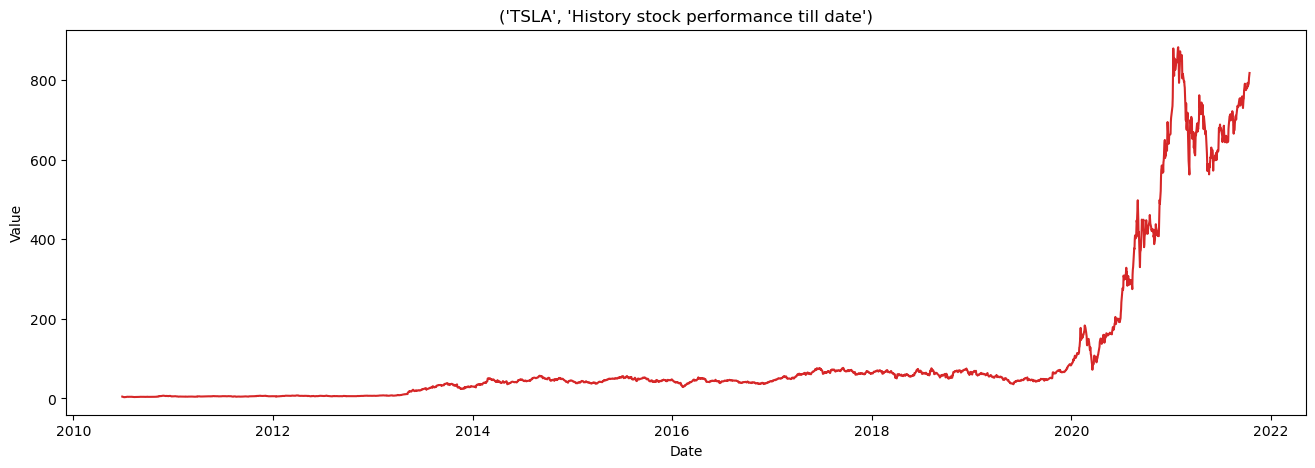

In [7]:
#Using the df_plot function, showing the results:
stock_name= "TSLA"
title = (stock_name,"History stock performance till date")
df_plot(df , x , y , title=title,xlabel='Date', ylabel='Value',dpi=100)




In [8]:
#To understand the destribution of our dataset, we use "describe" function:
df.describe()


,Date,Open,High,Low,Close,Adj Close,Volume
count,2845,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2.845000e+03
mean,2016-02-20 19:25:39.964850688,105.797199,107.959321,103.485805,105.853488,105.853488,3.145634e+07
min,2010-06-29 00:00:00,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,2013-04-26 00:00:00,10.352000,10.748000,10.132000,10.400000,10.400000,1.252200e+07
50%,2016-02-23 00:00:00,45.868000,46.493999,45.099998,45.902000,45.902000,2.482100e+07
75%,2018-12-18 00:00:00,65.000000,66.251999,63.993999,65.234001,65.234001,4.014650e+07
max,2021-10-14 00:00:00,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08
std,NaN,188.691743,192.434544,184.592519,188.788993,188.788993,2.845125e+07


In [9]:
print(df.columns) # remind me, what coloumns do we have??

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [10]:
#Define x, y using multiple features (Open, High, Low, and Volume) from our dataset to predict the closing price of a stock (Close):

x = df[['Open', 'High','Low', 'Volume']]
y = df['Close']


Now we split our data into training and testing sets using "train_test_split" function from sklearn library. 
Spliting into training set (85% of the data) and a testing set as a 15%.


In [11]:

#shuffle is 'False' to make sure that the data is not shuffled before spliting it.

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)

# let's check if total observation makes sense, by checking the dimensions(nr of rows, columns):

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(2418, 4)
(427, 4)
(2418,)
(427,)


In [12]:
#Fitting a linear regression model to our training data, and printing the coefficients and intercept:
regression = LinearRegression()
regression.fit(train_x, train_y)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)

regression coefficient [-6.66186258e-01  8.05425060e-01  8.61870058e-01  7.23604376e-10]
regression intercept 0.007971280092071709



Calculating the coefficient of determination (R-squared), which measures how good the used regression model fits in the data,it has a value between (0-1).
If the confidence is close to 1, it means the model is a good representation of the variance in our tested data.


In [13]:

regression_confidence = regression.score(test_x, test_y) # R-squared value using the score method 
#result = round(regression_confidence , 20)
print("linear regression confidence: ", regression_confidence)

linear regression confidence:  0.9990421837344874


In [14]:
#Prediction:the predicted list of data points from open, high, low, and vol are not sorted based on time or date, at this point It’s not important to sort these data point, as we will plot is based on their associated dates using scatter plot() method.

predicted=regression.predict(test_x)
print(test_x.head())



            Open        High         Low     Volume
2418  139.983994  159.166000  137.399994  199404000
2419  146.110001  153.949997  146.000000   85317500
2420  160.000000  163.998001  150.479996  123446000
2421  153.757996  156.701996  151.600006   58487500
2422  155.574005  157.949997  152.673996   60112500


In [15]:
#Comparing the difference between the predicted prices by our model and the actual prices:
actual_vs_predicted=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted})
actual_vs_predicted.head(20)

,Actual_Price,Predicted_Price
2418,149.792007,153.514074
2419,149.613998,152.561446
2420,154.255997,155.289799
2421,154.876007,154.490049
2422,153.457993,155.212236
2423,160.800003,159.724810
2424,160.005997,161.534791
2425,171.679993,169.945107
2426,183.483994,184.557673
2427,179.882004,173.706903


In [16]:
actual_vs_predicted.describe()

,Actual_Price,Predicted_Price
count,427.000000,427.000000
mean,493.579807,492.520855
std,239.491414,239.118921
min,72.244003,73.900428
25%,278.413987,275.906968
50%,580.880005,580.547175
75%,691.334992,689.551836
max,883.090027,878.985851


Now the model evaluation: We do an evaluation using the Mean squared error( MSE), which measures the average of the errors squared. 

In [17]:
#We can determine that using Mean squared error MSE

# MSE takes two arguments: the actual price and the predicted values from our  regression model

print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, predicted))



Mean Squared Error (MSE) : 54.80798420031357


In order to understand whether our MSE= 54.808 is a good result, we must consider what is the range of our data. Our data ranges between 0-1000, hence MSE= 54.808 is a good result (comparatively small).


In [18]:
#Analysing the liear regression models accuracy:

x2 = actual_vs_predicted.Actual_Price.mean()

y2 = actual_vs_predicted.Predicted_Price.mean()

Accuracy1 = y2/x2*100
print("The accuracy of the model is" , Accuracy1, "percent.")


The accuracy of the model is 99.78545477662475 percent.


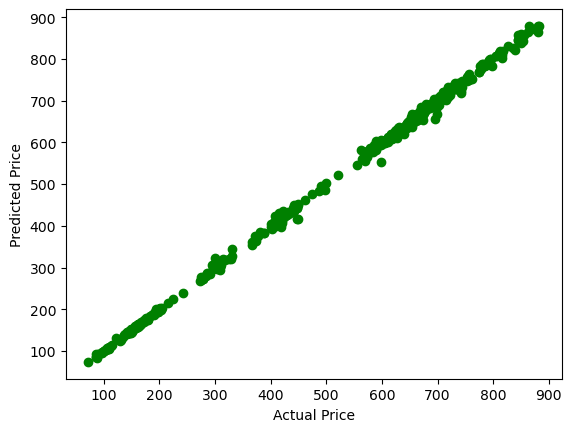

In [19]:
plt.scatter(actual_vs_predicted.Actual_Price, actual_vs_predicted.Predicted_Price,  color='green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

To show more of our work, we're gonna go back a bit:

The code below was written in a separate project prior to the work above, but the results were not great: 

Mean Squared Error: 168584.05096322185 (this is a huge number comparing to our dataset range)

R-squared: -1.1806584423815538 (this is not allowed to be a negative number)

Mean Squared Error: 168584.05096322185
R-squared: -1.1806584423815538


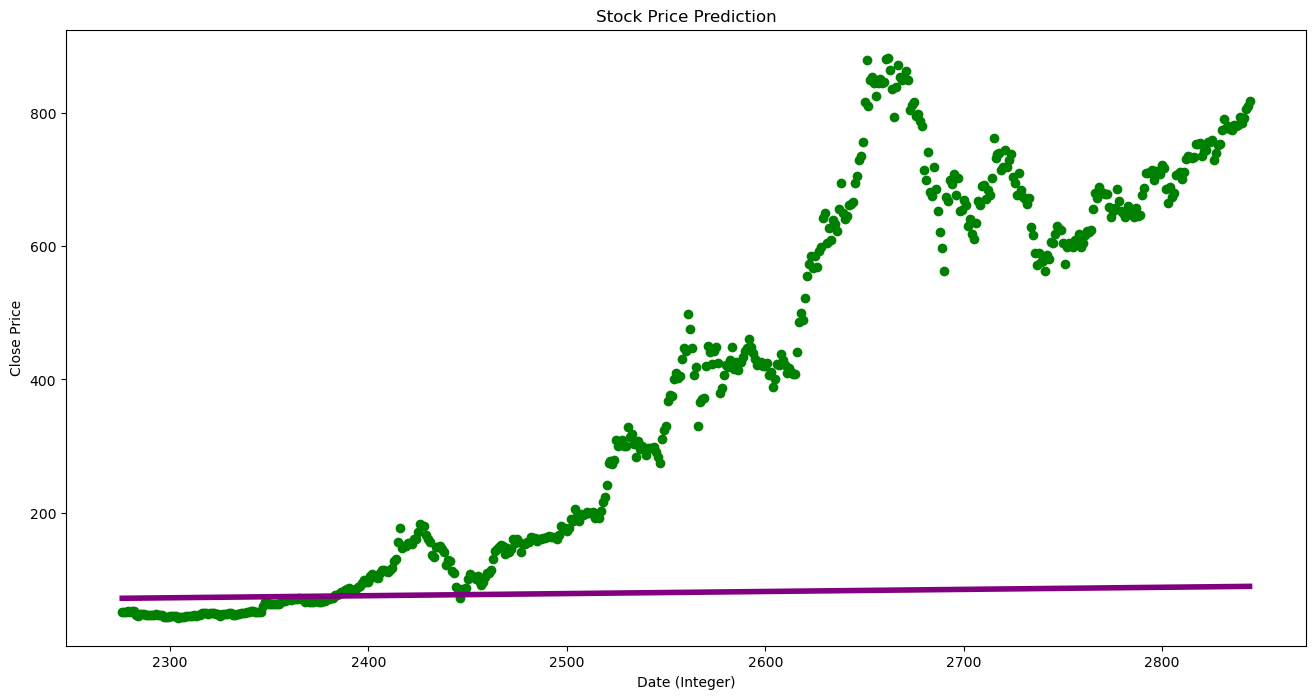

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from TESLA.csv

url="https://raw.githubusercontent.com/atikagondal/Assignment-2-dave3625-202323/main/TSLA.csv"
df = pd.read_csv(url)

# Assuming 'Date' is in datetime format, we can parse it as a datetime object:
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by date
df = df.sort_values('Date')

# Choose the 'Date' and 'Close' columns for prediction
df= df[['Date', 'Close']]

# Set the 'Date' column as the index, because the date has a unique value
#data.set_index('Date', inplace=True)

# Add a column with integer dates for easier indexing
df['DateInt'] = np.arange(len(df))

# Split the data into training and testing sets
train_df, test_df= train_test_split(df, test_size=0.2, shuffle=False)

# Split the data into features (X) and target (y)
X_train = train_df[['DateInt']]
y_train = train_df['Close']
X_test = test_df[['DateInt']]
y_test = test_df['Close']

# Train a linear regression model, fitting a linear regression model to our training data, and printing the coefficients and intercept:
regression = LinearRegression()
model = LinearRegression()
model.fit(X_train, y_train)

# Makeing the price predictions using predict function from sklearn:
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (percentage score)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the actual vs. predicted values
plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='purple', linewidth=4)
plt.title('Stock Price Prediction')
plt.xlabel('Date (Integer)')
plt.ylabel('Close Price')
plt.show()
